In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
mouse_data
clinical_data = pd.read_csv(clinical_trial_data_to_load)
clinical_data.head()
# Combine the data into a single dataset
all_data = pd.merge(mouse_data, clinical_data, how='outer', on='Mouse ID')

# Display the data table for preview
all_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_data = all_data.groupby(["Drug", "Timepoint"]).mean()
# Convert to DataFrame
drug_df = pd.DataFrame(drug_data)
# Preview DataFrame
drug_df.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
data_sem = all_data.groupby(["Drug", "Timepoint"]).sem()
# Convert to DataFrame
tumor_df = pd.DataFrame(data_sem["Tumor Volume (mm3)"])
# Preview DataFrame
tumor_df.head()
tumor_sem_pivot = data_sem.reset_index().pivot('Timepoint', 'Drug', 'Tumor Volume (mm3)')
tumor_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [4]:
drug_list=list(all_data['Drug'].unique())
drug_list

['Stelasyn',
 'Propriva',
 'Naftisol',
 'Ketapril',
 'Capomulin',
 'Infubinol',
 'Ceftamin',
 'Zoniferol',
 'Ramicane',
 'Placebo']

In [5]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [6]:
drug_by_time = drug_df.reset_index().pivot('Timepoint', 'Drug', 'Tumor Volume (mm3)')

In [7]:
drug_by_time

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [8]:
drug_by_time.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

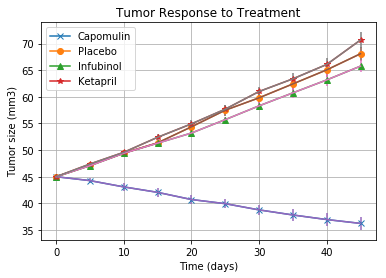

In [9]:
# Generate the Plot (with Error Bars)
plt.plot(drug_by_time.index, drug_by_time['Capomulin'], marker='x')
plt.plot(drug_by_time.index, drug_by_time['Placebo'], marker='o')
plt.plot(drug_by_time.index, drug_by_time['Infubinol'], marker='^')
plt.plot(drug_by_time.index, drug_by_time['Ketapril'], marker='*')
plt.grid()
plt.legend(loc='best')
plt.errorbar(drug_by_time.index, drug_by_time['Capomulin'], yerr=tumor_sem_pivot['Capomulin'])
plt.errorbar(drug_by_time.index, drug_by_time['Placebo'], yerr=tumor_sem_pivot['Placebo'])
plt.errorbar(drug_by_time.index, drug_by_time['Infubinol'], yerr=tumor_sem_pivot['Infubinol'])
plt.errorbar(drug_by_time.index, drug_by_time['Ketapril'], yerr=tumor_sem_pivot['Ketapril'])
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor size (mm3)")
# Save the Figure
plt.savefig("./TumorDensity.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site_mean = all_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
met_site_df = pd.DataFrame(met_site_mean)
# Preview DataFrame
met_site_df.head(10)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_sem = all_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
met_site_sem_df = pd.DataFrame(met_site_sem)
# Preview DataFrame
met_site_sem_df.head(10)
met_sem_pivot = met_site_sem_df.reset_index().pivot('Timepoint', 'Drug', 'Metastatic Sites')
met_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [12]:
# Minor Data Munging to Re-Format the Data Frames
drug_time_met = met_site_df.reset_index().pivot('Timepoint', 'Drug', 'Metastatic Sites')
# Preview that Reformatting worked
drug_time_met.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


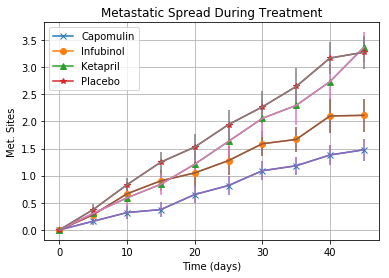

In [13]:
# Generate the Plot (with Error Bars)
plt.plot(drug_time_met.index, drug_time_met['Capomulin'], marker='x')
plt.plot(drug_time_met.index, drug_time_met['Infubinol'], marker='o')
plt.plot(drug_time_met.index, drug_time_met['Ketapril'], marker='^')
plt.plot(drug_time_met.index, drug_time_met['Placebo'], marker='*')
plt.legend(loc='best')
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Met. Sites")
plt.grid()
plt.errorbar(drug_time_met.index, drug_time_met['Capomulin'], yerr=met_sem_pivot['Capomulin'])
plt.errorbar(drug_time_met.index, drug_time_met['Infubinol'], yerr=met_sem_pivot['Infubinol'])
plt.errorbar(drug_time_met.index, drug_time_met['Ketapril'], yerr=met_sem_pivot['Ketapril'])
plt.errorbar(drug_time_met.index, drug_time_met['Placebo'], yerr=met_sem_pivot['Placebo'])
# Save the Figure
plt.savefig("./MetSpread.png")
# Show the Figure
plt.show()

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = all_data.groupby(["Drug", "Timepoint"])
mouse_count = mice["Mouse ID"].count()
# Convert to DataFrame
mouse_df = pd.DataFrame(mouse_count)
# Preview DataFrame
mouse_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [18]:
# Minor Data Munging to Re-Format the Data Frames
mouse_data = mouse_df.reset_index().pivot('Timepoint', 'Drug', 'Mouse ID')
# Preview the Data Frame
mouse_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


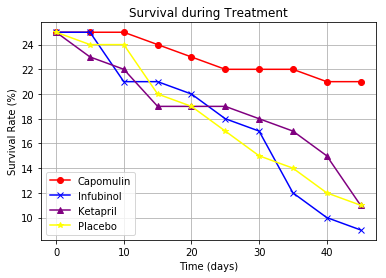

In [31]:
# Generate the Plot (Accounting for percentages)
plt.plot(mouse_data.index, mouse_data['Capomulin'], marker = 'o', color='red')
plt.plot(mouse_data.index, mouse_data['Infubinol'], marker = 'x', color='blue')
plt.plot(mouse_data.index, mouse_data['Ketapril'], marker = '^', color='purple')
plt.plot(mouse_data.index, mouse_data['Placebo'], marker = '*', color='yellow')
plt.grid()
plt.legend(loc='best')
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival during Treatment")
# Save the Figure
plt.savefig("./mouseplot.png")
# Show the Figure
plt.show()

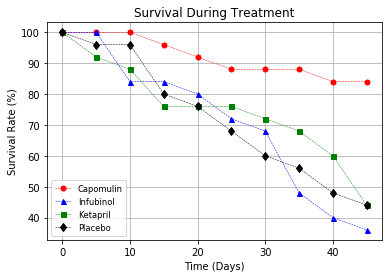

## Summary Bar Graph

In [47]:
# Calculate the percent changes for each drug
perc_change = []
for drug in drug_list:
    start = drug_by_time[drug][drug_by_time.index[0]]
    end = drug_by_time[drug][drug_by_time.index[-1]]
    perc_change.append((end-start)/start)
# Display the data to confirm
perc_change

[0.5208513428789903,
 0.4724117486320637,
 0.5392334713476923,
 0.5702879468660608,
 -0.19475302667894173,
 0.4612347172785187,
 0.4251649185589744,
 0.4657975086509525,
 -0.22320900462766674,
 0.5129796048315153]

In [52]:
drug_change_df = pd.DataFrame(perc_change, drug_list)
drug_change_df

,0
Stelasyn,0.520851
Propriva,0.472412
Naftisol,0.539233
Ketapril,0.570288
Capomulin,-0.194753
Infubinol,0.461235
Ceftamin,0.425165
Zoniferol,0.465798
Ramicane,-0.223209
Placebo,0.512980


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

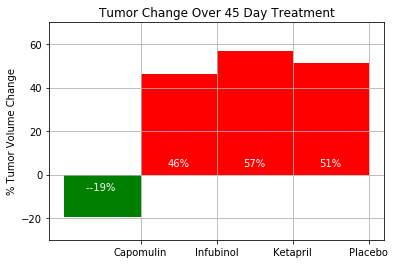